In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import scipy.stats as stats

In [5]:
df = pd.read_csv("data/databanks.csv")

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Different categorial features and there values in the dataset are:

In [7]:
print("Jobs: \n", df["job"].unique(),'\n')
print("Marital Status: \n", df['marital'].unique(),'\n')
print("Education: \n", df['education'].unique(),'\n')
print("Default on Credit: \n", df['default'].unique(),'\n')
print("Housing loan: \n", df['housing'].unique(),'\n')
print("Loan default: \n", df['loan'].unique(),'\n')
print("Contact type: \n", df['contact'].unique(),'\n')
print("Months: \n", df['month'].unique(),'\n')
print("day_of_week: \n", df['day_of_week'].unique(),'\n')
print("Poutcome: \n",df["poutcome"].unique(),'\n')


Jobs: 
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

Marital Status: 
 ['married' 'single' 'divorced' 'unknown'] 

Education: 
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

Default on Credit: 
 ['no' 'unknown' 'yes'] 

Housing loan: 
 ['no' 'yes' 'unknown'] 

Loan default: 
 ['no' 'yes' 'unknown'] 

Contact type: 
 ['telephone' 'cellular'] 

Months: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 

day_of_week: 
 ['mon' 'tue' 'wed' 'thu' 'fri'] 

Poutcome: 
 ['nonexistent' 'failure' 'success'] 



In [9]:
labelencoder_X = LabelEncoder()

In [10]:
df["job"] = labelencoder_X.fit_transform(df["job"])
df["marital"] = labelencoder_X.fit_transform(df["marital"])
df["education"] = labelencoder_X.fit_transform(df["education"])
df["default"] = labelencoder_X.fit_transform(df["default"])
df["housing"] = labelencoder_X.fit_transform(df["housing"])
df["loan"] = labelencoder_X.fit_transform(df["loan"])
df["contact"] = labelencoder_X.fit_transform(df["contact"])
df["month"] = labelencoder_X.fit_transform(df["month"])
df["day_of_week"] = labelencoder_X.fit_transform(df["day_of_week"])
df["poutcome"] = labelencoder_X.fit_transform(df["poutcome"])

In [11]:
pd.set_option('max_columns', None)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [16]:
Y = (df['y'] == 'yes')*1

In [17]:
df.drop('y', axis = 1, inplace = True)

In [18]:
df['y'] = Y

In [19]:
df[df['y'] == 1].shape

(4640, 21)



From the above output we can see that out of 41k odd entries, we have only 4640 positive instances. Out data is imballenced.

In [25]:
y_count_0, y_count_1 = df['y'].value_counts()
y_0 = df[df['y'] == 0]
y_1 = df[df['y'] == 1]
print('y 0:', y_0.shape)
print('y 1:', y_1.shape)

y 0: (36548, 21)
y 1: (4640, 21)


total y of 1 and0: 1    4640
0    4640
Name: y, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

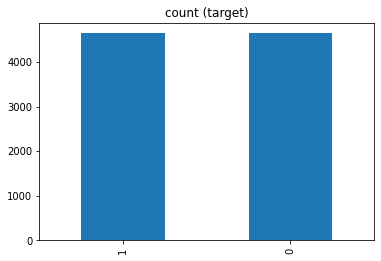

In [30]:
y_0_under = y_0.sample(y_count_1)

df_under = pd.concat([y_0_under, y_1], axis=0)

print("total y of 1 and0:",test_under['y'].value_counts())
test_under['y'].value_counts().plot(kind='bar', title='count (target)')

<AxesSubplot:>

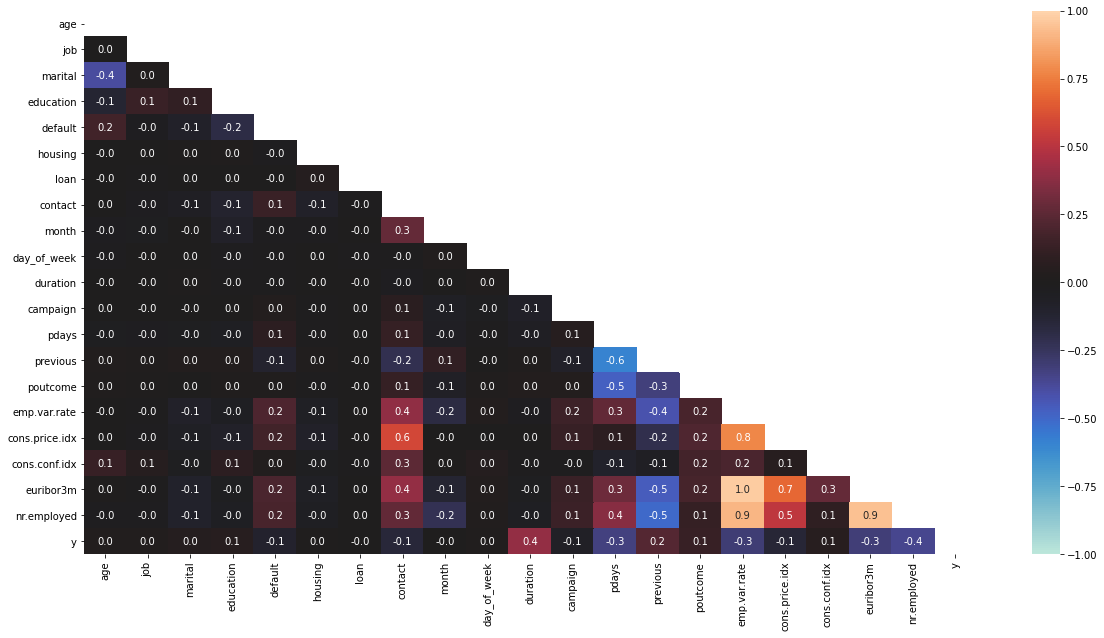

In [33]:
fig, ax = plt.subplots(figsize = (20, 10))
matrix = np.triu(df_under.corr())
sns.heatmap(df.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, mask=matrix)



Output has a good correlation with duration, pdays, emp.var.rate, euribor3m and nr.employed. Therefore they might form a very good features compared to others. We should also note that emp.var.rate has a high correlation with nr.employed, euribor3m and cons.price.idx. So we might need to consider this while selecting our features

In [34]:

for i in ["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"]:
    print("Results for categorical variable {} is:\n".format(i))
    print(df_under.groupby(i)['y'].mean())

Results for categorical variable job is:

job
0     0.546042
1     0.361473
2     0.430556
3     0.464912
4     0.495468
5     0.704545
6     0.506803
7     0.419481
8     0.823353
9     0.484085
10    0.558140
11    0.456790
Name: y, dtype: float64
Results for categorical variable marital is:

marital
0    0.472222
1    0.466212
2    0.574468
3    0.571429
Name: y, dtype: float64
Results for categorical variable education is:

education
0    0.474501
1    0.389234
2    0.408110
3    0.495435
4    0.571429
5    0.500421
6    0.552614
7    0.574371
Name: y, dtype: float64
Results for categorical variable default is:

default
0    0.539114
1    0.296519
2    0.000000
Name: y, dtype: float64
Results for categorical variable housing is:

housing
0    0.488193
1    0.502347
2    0.509864
Name: y, dtype: float64
Results for categorical variable loan is:

loan
0    0.500911
1    0.502347
2    0.494569
Name: y, dtype: float64
Results for categorical variable contact is:

contact
0    0.580883


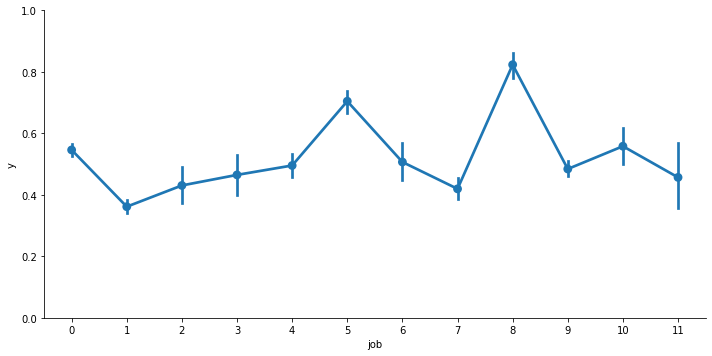

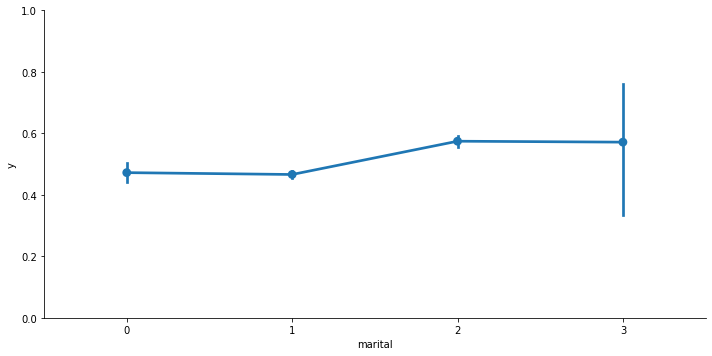

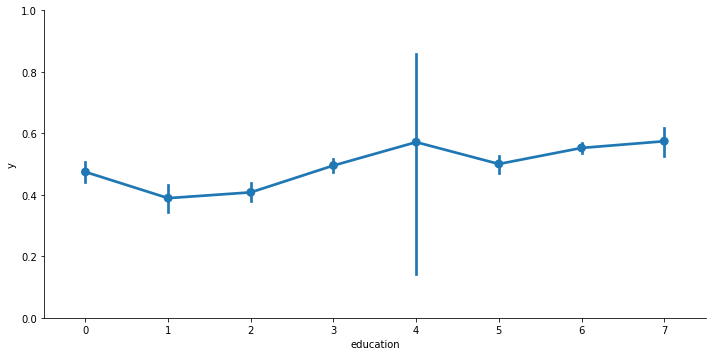

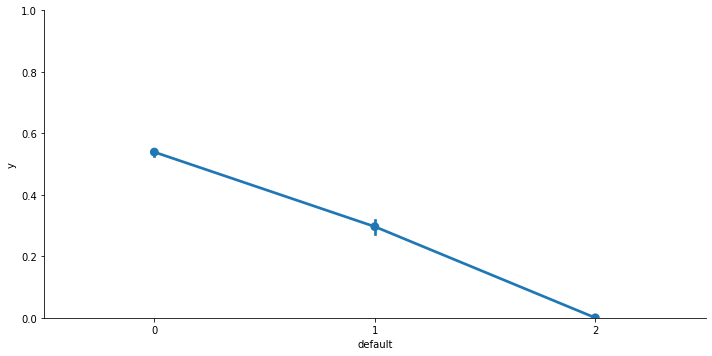

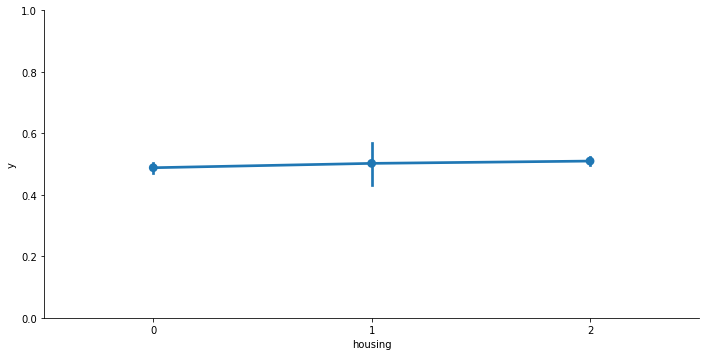

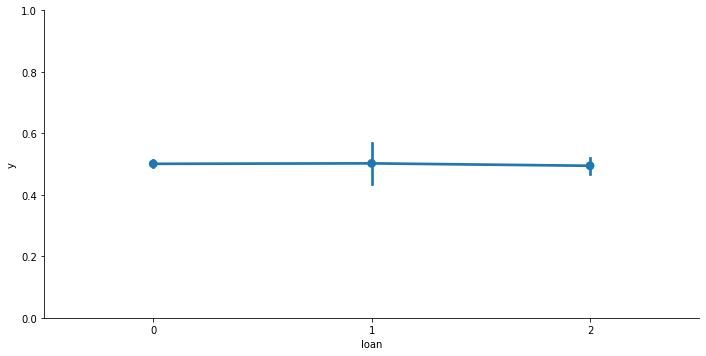

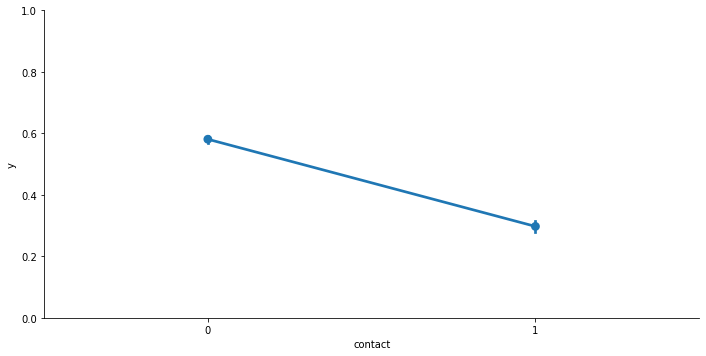

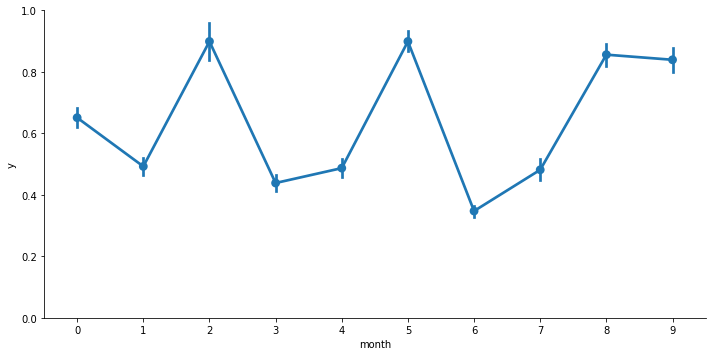

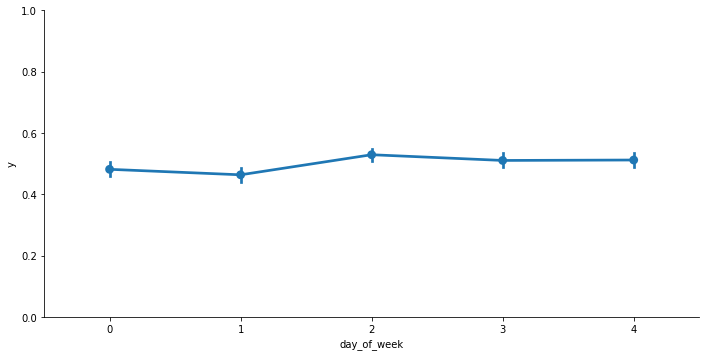

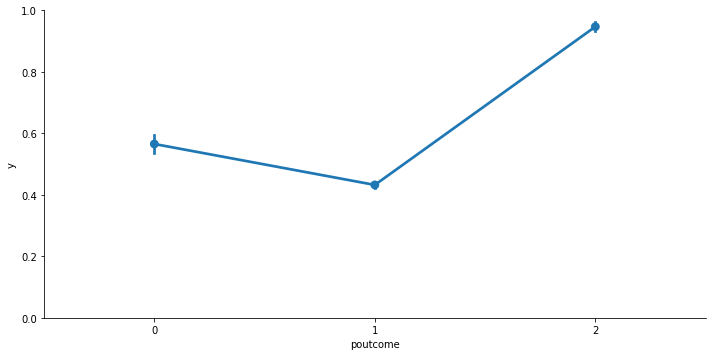

In [35]:
for col in ["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"]:
    sns.catplot(x=col, y='y', data=df_under, kind='point', aspect=2, )
    plt.ylim(0, 1)



From the above graphs we can see that Housing and loan remains almost constant and dont have much if an effect.

In [43]:
def describe_cont_feature(feature):
    print('\n*** Results for {} ***'.format(feature))
    print(df_under.groupby('y')[feature].describe())
    print(ttest(feature))
    
def ttest(feature):
    survived = df_under[df_under['y']==1][feature]
    not_survived = df_under[df_under['y']==0][feature]
    tstat, pval = stats.ttest_ind(survived, not_survived, equal_var=False)
    print('t-statistic: {:.1f}, p-value: {:.3}'.format(tstat, pval))

In [44]:
for feature in ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']:
    describe_cont_feature(feature)


*** Results for age ***
    count       mean        std   min   25%   50%   75%   max
y                                                            
0  4640.0  40.139440   9.858459  18.0  33.0  38.0  47.0  95.0
1  4640.0  40.913147  13.837476  17.0  31.0  37.0  50.0  98.0
t-statistic: 3.1, p-value: 0.00193
None

*** Results for job ***
    count      mean       std  min  25%  50%  75%   max
y                                                      
0  4640.0  3.699138  3.594084  0.0  1.0  2.0  7.0  11.0
1  4640.0  3.978017  3.642749  0.0  0.0  4.0  8.0  11.0
t-statistic: 3.7, p-value: 0.000207
None

*** Results for marital ***
    count      mean       std  min  25%  50%  75%  max
y                                                     
0  4640.0  1.147845  0.599378  0.0  1.0  1.0  2.0  3.0
1  4640.0  1.251724  0.631498  0.0  1.0  1.0  2.0  3.0
t-statistic: 8.1, p-value: 4.96e-16
None

*** Results for education ***
    count      mean       std  min  25%  50%  75%  max
y                    



From the above output, we can see that age, housing and month have p-value greater than 0.5 therefore we can eleminate them as they fail null hypothesis.


In [47]:
import os
datapath = 'data1'
if not os.path.exists(datapath):
    os.mkdir(datapath)
databank = os.path.join(datapath, 'data_under.csv')
if not os.path.exists(databank):
    df.to_csv(databank, index=False)